In [3]:
import xarray as xr
import matplotlib.pyplot as plt

datapath = f'/g/data/fy29/mjl561/cylc-run/rns_ostia_2019_bushfire/netcdf'

In [19]:
variable = 'stratiform_rainfall_flux'
da1 = xr.open_dataset(f'{datapath}/{variable}/E5L_1_CCI_WC_{variable}.nc')[variable]

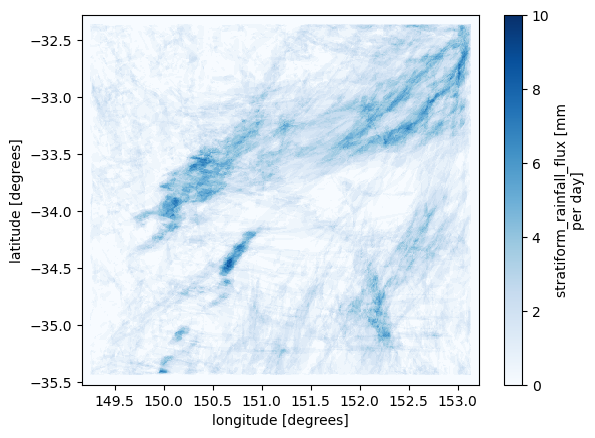

In [31]:
# calculate mean rain per day
s_in_day = 86400
da1_mean = da1.mean(dim='time')*s_in_day
da1_mean.attrs['units'] = 'mm per day'

da1_mean.plot(cmap = 'Blues', vmin=0, vmax=10)

Text(0.5, 1.0, 'Mean rainfall per day')

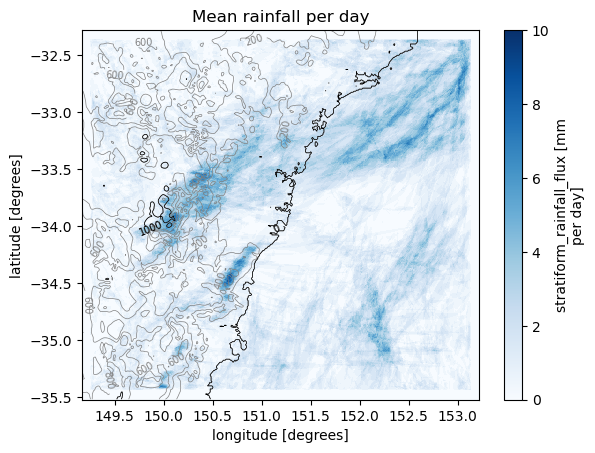

In [87]:
# now plot with surface altitude contours
variable = 'surface_altitude'
sa1 = xr.open_dataset(f'{datapath}/{variable}/E5L_1_CCI_WC_{variable}.nc')[variable].isel(time=0)

# create subplot
fig, ax = plt.subplots()
da1_mean.plot(ax = ax, cmap = 'Blues', vmin=0, vmax=10)

# plot contours with level texts
contours1 = sa1.plot.contour(ax=ax, levels=range(0, 2000, 200), colors='0.5', linewidths=0.5)
contours2 = sa1.plot.contour(ax=ax, levels=range(0, 2000, 1000), colors='black', linewidths=0.5)

# label contours
ax.clabel(contours1, fmt='%d', fontsize=7)
ax.clabel(contours2, fmt='%d', fontsize=7)

ax.set_title('Mean rainfall per day')